## Aplicacion y usos practicos de JULIA

### Plots de funciones

In [1]:
using Pkg
Pkg.add("GR")
Pkg.add("Plots")
Pkg.add("Plotly")
Pkg.add("PyPlot")

using Plots

   Updating registry at `C:\Users\sbianco\.julia\registries\General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `C:\Users\sbianco\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\sbianco\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\sbianco\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\sbianco\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\sbianco\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\sbianco\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\sbianco\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\sbianco\.julia\environments\v1.4\Manifest.toml`
 [no changes]


#### EJEMPLO BASICO

In [2]:
x = -3:0.1:3

-3.0:0.1:3.0

In [3]:
f(x) = x^3
y = f.(x) ## BROADCASTING

61-element Array{Float64,1}:
 -27.0
 -24.389
 -21.951999999999995
 -19.683000000000003
 -17.576000000000004
 -15.625
 -13.824
 -12.166999999999996
 -10.648000000000003
  -9.261000000000001
  -8.0
  -6.858999999999999
  -5.832000000000001
   ⋮
   6.858999999999999
   8.0
   9.261000000000001
  10.648000000000003
  12.166999999999996
  13.824
  15.625
  17.576000000000004
  19.683000000000003
  21.951999999999995
  24.389
  27.0

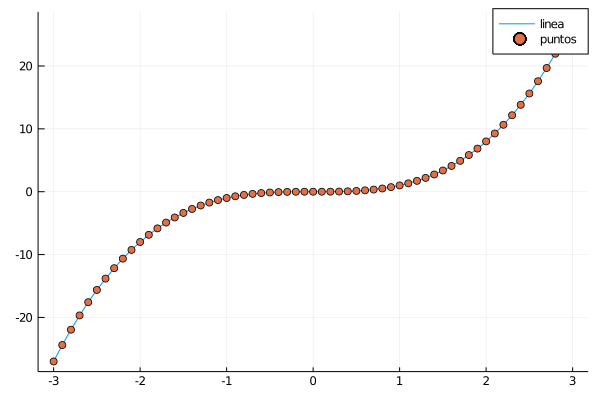

In [4]:
gr() ## cambio el backend
plot!(x, y, label="linea")
scatter!(x, y, label="puntos")

##### Graficar una animacion

┌ Info: Saved animation to 
│   fn = C:\Users\sbianco\Desktop\tdl\lalal\trunk\workdir\Sintaxis\anim_fps15.gif
└ @ Plots C:\Users\sbianco\.julia\packages\Plots\VA7Vx\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sbianco\\Desktop\\tdl\\lalal\\trunk\\workdir\\Sintaxis\\anim_fps15.gif")
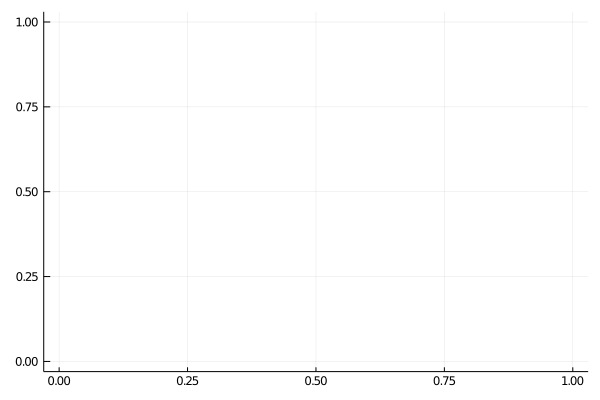

In [5]:
gr() 
p = plot([sin, cos], zeros(0), leg = false)
anim = Animation()
for x = range(0, stop = 10π, length = 100)
    push!(p, x, Float64[sin(x), cos(x)])
    frame(anim)
end
gif(anim, "anim_fps15.gif", fps = 15)


#### Otra animacion copada

┌ Info: Saved animation to 
│   fn = C:\Users\sbianco\Desktop\tdl\lalal\trunk\workdir\Sintaxis\tmp.gif
└ @ Plots C:\Users\sbianco\.julia\packages\Plots\VA7Vx\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sbianco\\Desktop\\tdl\\lalal\\trunk\\workdir\\Sintaxis\\tmp.gif")
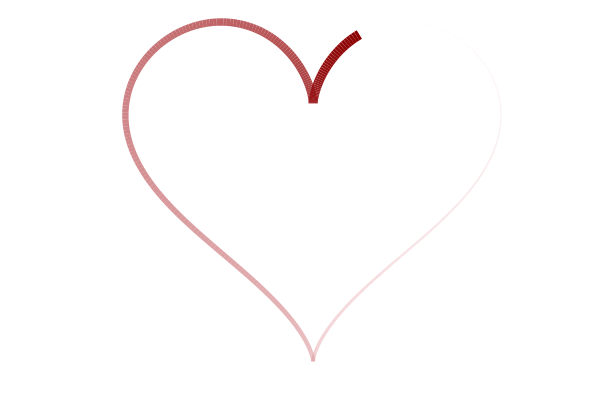

In [6]:
@userplot CirclePlot
@recipe function f(cp::CirclePlot)
    x, y, i = cp.args
    n = length(x)
    inds = circshift(1:n, 1 - i)
    linewidth --> range(0, 10, length = n)
    seriesalpha --> range(0, 1, length = n)
    aspect_ratio --> 1
    label --> false
    x[inds], y[inds]
end

n = 400
t = range(0, 2π, length = n)
x = 16sin.(t).^3
y = 13cos.(t) .- 5cos.(2t) .- 2cos.(3t) .- cos.(4t)
@gif for i ∈ 1:n
    circleplot(x, y, i, line_z = 1:n, cbar = false, c = :reds, framestyle = :none)
end when i > 40 && mod1(i, 10) == 5